<a href="http://lnls.cnpem.br/"><img src="http://fig.if.usp.br/~biofisic/images/logo_lnls.jpg" style="width:90px; float: left;"></a><h1> Reading Cordoalha Temperature  </h1>

----

> Analyzing temperature data from PT100 and Data Acquisition Keysight 34970A - 'Cordoalha 50,00 mm²'.


In [1]:
'''
Created on 06/07/2017
@author: lucas.balthazar
'''

'\nCreated on 06/07/2017\n@author: lucas.balthazar\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import sys
from sympy import *
from PySide import QtGui
init_printing()

In [3]:
# Modifying the plot style
style.use('fivethirtyeight')

In [4]:
# Plot in line, if necessary
%matplotlib inline 

In [5]:
# Variables
x = symbols('x')
yx = symbols('y(x)')

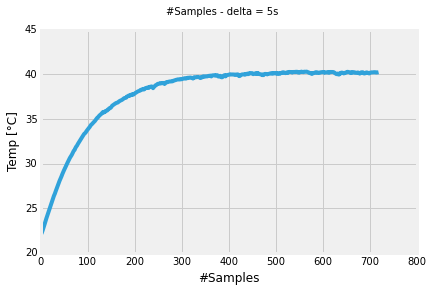

In [6]:
## select file
Data = np.array([])
temp_arr = []

try:
    app=QtGui.QApplication.instance()
    if not app:
        app = QtGui.QApplication(sys.argv)
    file_path = QtGui.QFileDialog.getOpenFileNames()
    files = file_path[0]
except:
    raise TypeError ("Can't select file")
    #print("Can't select Fail")

## open and read file
try:
    arq = open(files[0],'r')
except:
    raise TypeError ("Can't read file")
    #print("Can't read file")

config = arq.read().split('\n')
arq.close()

for i in range(1, len(config)-1):
    config[i]=config[i].split('\t')
    temp = config[i][3].format("{0:.2f}")
    temp_arr.append(float(temp))
plt.plot(temp_arr)
plt.grid(True)
plt.ylabel('Temp [°C]')
plt.xlabel('#Samples')
plt.suptitle('#Samples - delta = 5s')



In [7]:
vector = np.asarray(temp_arr, dtype=float)
a = np.linspace(1,720,720)
comp = len(vector)
poly = np.polyfit(a,vector,5)
ploy1d = np.poly1d(poly)
print(ploy1d)

          5             4             3             2
7.99e-13 x - 1.849e-09 x + 1.685e-06 x - 0.0007678 x + 0.1808 x + 21.76


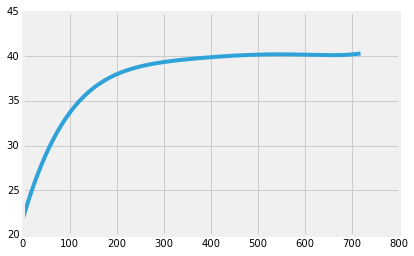

In [8]:
poly_fit_graph = []
for i in range(len(a)):   
    num = ploy1d(i)
    poly_fit_graph.append(float(num))
plt.plot(poly_fit_graph)


### Fit polynomial curve for increase temperature for Cordoalha (50.00 mm²)

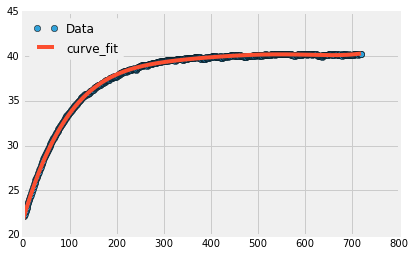

In [9]:
plt.plot(a,temp_arr,'o', a ,poly_fit_graph,'-')
plt.legend(['Data','curve_fit'], loc='best')

In [10]:
Equa = Eq(yx,7.99e-13*x**5-1.849e-09*x**4+1.685e-6*x**3-7.678e-04*x**2+1.808e-01*x+21.76)
Equa